# Customer segmentation

# Task:

Identfying the Most Important group of customers based on Income, Age and The Mall shopping score

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
Mall_Customers = pd.read_csv('Mall_Customers.csv')

In [3]:
Mall_Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
Mall_Customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

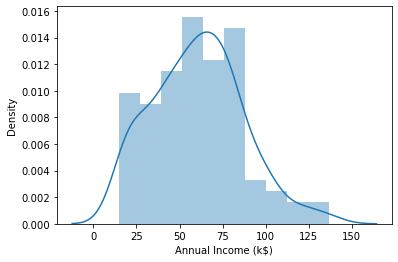

In [5]:
sns.distplot(Mall_Customers['Annual Income (k$)'])

In [6]:
Mall_Customers.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

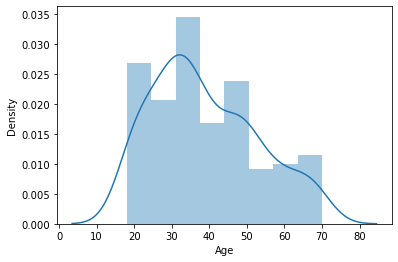

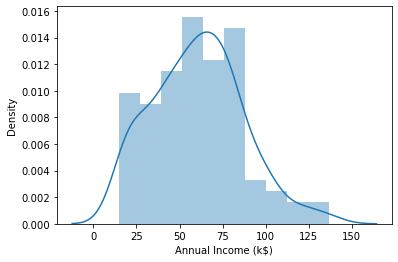

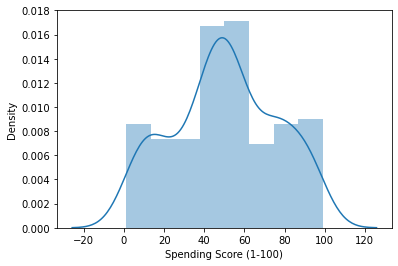

In [7]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(Mall_Customers[i])

<AxesSubplot:xlabel='value', ylabel='Density'>

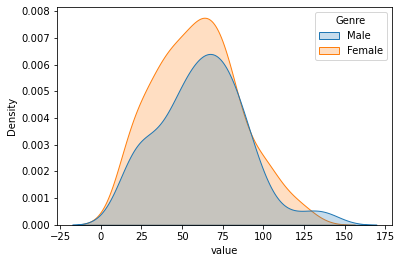

In [8]:
melted_data = pd.melt(Mall_Customers, id_vars=['Genre'], value_vars=['Annual Income (k$)'])
sns.kdeplot(data=melted_data, x='value', shade=True, hue='Genre')

<AxesSubplot:xlabel='value', ylabel='Density'>

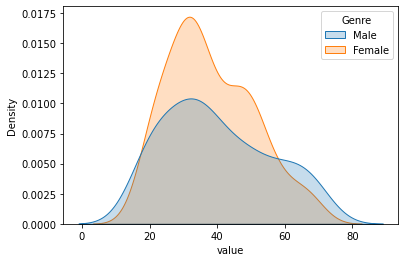

In [9]:
melted_data = pd.melt(Mall_Customers, id_vars=['Genre'], value_vars=['Age'])
sns.kdeplot(data=melted_data, x='value', shade=True, hue='Genre')

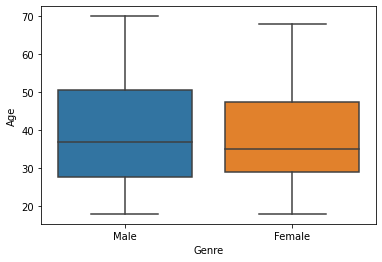

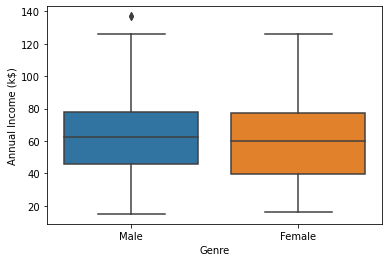

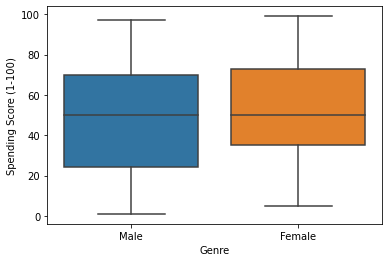

In [10]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data = Mall_Customers, x = 'Genre', y = Mall_Customers[i])

In [11]:
Mall_Customers['Genre'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

# Bivariate Analysis

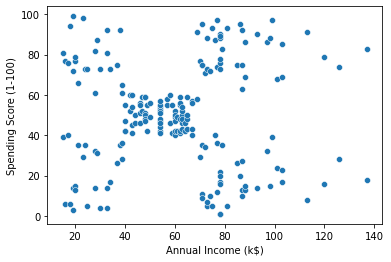

In [12]:
sns.scatterplot(data = Mall_Customers, x = 'Annual Income (k$)', y =  'Spending Score (1-100)');

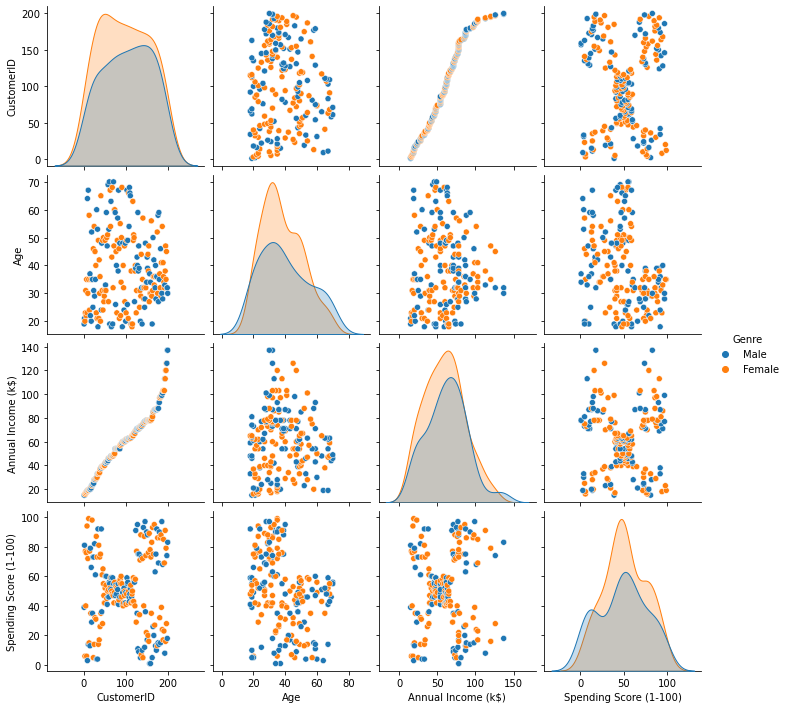

In [13]:
#Mall_Customers = Mall_Customers.drop('CustomerID', axis = 1)
sns.pairplot(Mall_Customers, hue = 'Genre');

In [14]:
Mall_Customers.groupby(['Genre'])['Age','Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
Mall_Customers.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


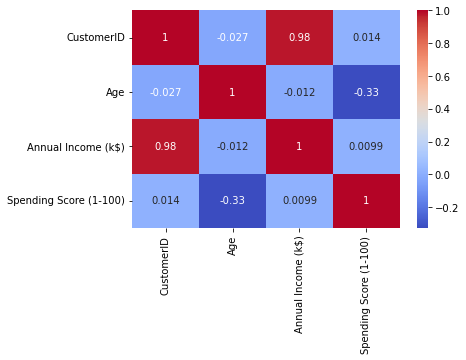

In [16]:
sns.heatmap(Mall_Customers.corr(), annot = True, cmap = 'coolwarm');


# Clustering-univariate, Bivariate, multivariate

# Univariate Clustering

In [17]:
clustering1 = KMeans(n_clusters = 3)

In [18]:
clustering1.fit(Mall_Customers[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [19]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
Mall_Customers['Income cluster'] = clustering1.labels_
Mall_Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [21]:
Mall_Customers['Income cluster'].value_counts()

2    90
1    74
0    36
Name: Income cluster, dtype: int64

In [22]:
clustering1.inertia_

23517.330930930926

In [23]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Mall_Customers[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [24]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930926,
 13278.112713472487,
 8481.496190476191,
 5081.484660267269,
 3936.7968253968256,
 2836.339987789987,
 2189.256371406372,
 1766.9739538239537]

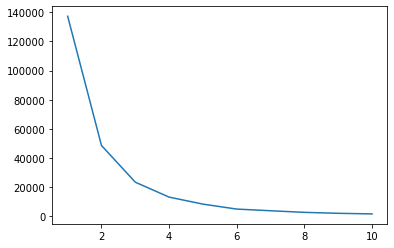

In [25]:
plt.plot(range(1,11), inertia_scores)

Elbow starts at three 

In [26]:
Mall_Customers.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income cluster'],
      dtype='object')

In [27]:
Mall_Customers.groupby('Income cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


# Bivariate Clustering

In [28]:
clustering2 = KMeans(n_clusters = 5)
clustering2.fit(Mall_Customers[['Annual Income (k$)',
                                'Spending Score (1-100)']])
Mall_Customers['Spending and Income cluster'] = clustering2.labels_
Mall_Customers.head()
                               
                               

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


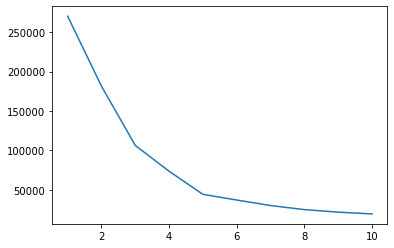

In [29]:
inertia_scores2 = []
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(Mall_Customers[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2)

    

In [30]:
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [31]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

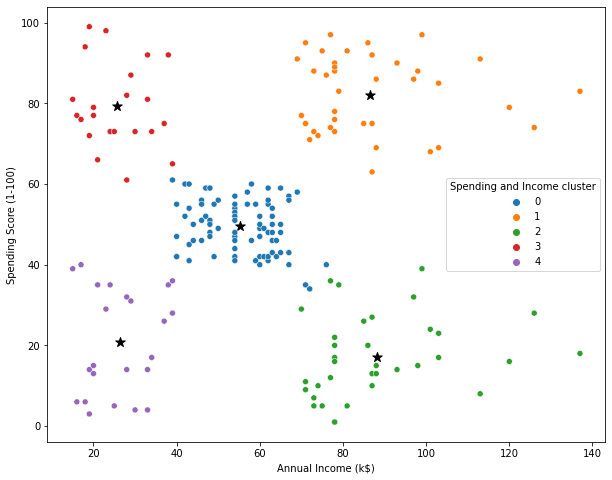

In [32]:
plt.figure(figsize = (10,8))
plt.scatter(x = centers['x'], y = centers['y'], s = 100, c = 'black', marker ='*')
sns.scatterplot(data = Mall_Customers, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income cluster', palette ='tab10')

In [33]:
pd.crosstab(Mall_Customers['Spending and Income cluster'], Mall_Customers['Genre'], normalize = 'index')

Genre,Female,Male
Spending and Income cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [34]:
Mall_Customers.groupby('Spending and Income cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


# Multivariate Clustering

In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:
scale = StandardScaler()

In [38]:
Mall_Customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,4


In [41]:
df = pd.get_dummies(Mall_Customers,drop_first = True)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income cluster,Spending and Income cluster,Genre_Male
0,1,19,15,39,1,4,1
1,2,21,15,81,1,3,1
2,3,20,16,6,1,4,0
3,4,23,16,77,1,3,0
4,5,31,17,40,1,4,0
...,...,...,...,...,...,...,...
195,196,35,120,79,0,1,0
196,197,45,126,28,0,2,0
197,198,32,126,74,0,1,1
198,199,32,137,18,0,2,1


In [42]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income cluster', 'Spending and Income cluster', 'Genre_Male'],
      dtype='object')

In [43]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Genre_Male']]

In [44]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [45]:
df = pd.DataFrame(scale.fit_transform(df))

In [46]:
df.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


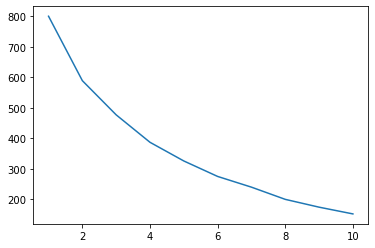

In [49]:
inertia_scores3 = []
for i in range(1,11):
    kmeans3 = KMeans(n_clusters = i)
    kmeans3.fit(df)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)